In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv
/kaggle/input/customer-support-on-twitter/sample.csv
/kaggle/input/customer-support-on-twitter/twcs/twcs.csv
/kaggle/input/all-final-data/all_final_data.csv


## TABLE OF CONTENT:


## 1) INTRODUCTION

## 2) NAIVE-BAYES THEOREM

## 3) SENTIMENTAL ANALYSIS

## 4) CASE STUDY: SENTIMENTAL ANALYSIS FOR MOVIE REVIEW USING NAVIE-BAYES CLASSIFIER

## 5) CONCLUSION


# 1. INTRODUCTION:

Bayes Theorem is named for English mathematician Thomas Bayes, who worked extensively in decision theory, the field of mathematics that involves probabilities.

Bayes Theorem is also used widely in machine learning, where it is a simple, effective way to predict classes with precision and accuracy. The Bayesian method of calculating conditional probabilities is used in machine learning applications that involve classification tasks.

A simplified version of the Bayes Theorem, known as the Naive Bayes Classification, is used to reduce computation time and costs. In this article, we take you through these concepts and discuss the applications of the Bayes Theorem in machine learning. 

# 2. NAVIE BAYES THEOREM:

### 2.1 Bayes Theorem Theory: 

Bayes Formula:
![](https://miro.medium.com/max/804/1*6dmvRYysiU5PwWIcHRdKVw.png)

Let’s Look into the terms:

P(C | x) = Probability of event C happening given that event x happened
P(x | C) = Probability of event x happening given that event C happened
P(C) = Probability of event C happening
P(x) = Probability of event x happening

The Bayes Theorem thus gives us a way to find the Conditional Probability . Bayes Theorem lies in the heart of the Naive Bayes theorem.

### 2.2. How to Apply Bayes Theorem in Machine Learning: 

The Naive Bayes Classifier, a simplified version of the Bayes Theorem, is used as a classification algorithm to classify data into various classes with accuracy and speed. 

Let’s see how the Naive Bayes Classifier can be applied as a classification algorithm. 

- Consider a general example: X is a vector consisting of ‘n’ attributes, that is, X = {x1, x2, x3, …, xn}.

- Say we have ‘m’ classes {C1, C2, …, Cm}. Our classifier will have to predict X belongs to a certain class. The class delivering the highest posterior probability will be chosen as the best class. So mathematically, the classifier will predict for class Ci iff P(Ci | X) > P(Cj | X). Applying Bayes Theorem:

P(Ci | X) = [P(X | Ci) * P(Ci)] / P(X)

- In this formula, P(X) is the condition-independent entity, which means it will be constant throughout the classes. It won’t change the value whenever the classes change. Therefore, to maximize P(Ci/X), which can also be termed as the precise answer to be derived, we will have to maximize the P(X/Ci) * P(Ci) value.

- With n number classes on the probability list let’s assume that the possibility of any class being the right answer is equally likely. Considering this factor, we can say that : P(C1)=P(C2)-P(C3)=P(C4)=…..=P(Cn).

- It is now easy to compute the smaller probabilities. One important thing to note here: since xk belongs to each attribute, we also need to check whether the attribute we are dealing with is categorical or continuous.

- Ultimately, we will have P(x | Ci) = F(xk, ?k, ?k).

Now, we have all the values we need to use Bayes Theorem for each class Ci. Our predicted class will be the class achieving the highest probability P(X | Ci) * P(Ci).

## 2.3. Advantage, DisAdvantage of Navie- Bayes Classifier:

## Advantage: 

- It is easy and fast to predict the class of the test data set. It also performs well in multi-class prediction.

- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.

- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

## Disadvantage: 

- Naive Bayes is also known as a bad estimator, so the probability outputs are not to be taken too seriously.

- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

# 3. SENTIMENTAL ANALYSIS: 

  Sentiment analysis is basically concerned with analysis of emotions and opinions from text.

 A sentiment evaluation system for text analysis combines natural language processing (NLP) and laptop mastering methods to assign weighted sentiment scores to the entities, topics, issues and categories inside a sentence or phrase.It tries to find and justify sentiment of the person with respect to a given source of content.

I am proposing a highly accurate model of sentiment analysis from a datasets containing movie review score with the help of classifiers such as Naïve Bayes, the application can correctly classify the reviews of the given datasets as positive and negative to give sentiment of each movie.

# 4. SENTIMENTAL ANALYSIS FOR MOVIE REVIEW USING NAVIE-BAYES

In this kernel, we have to predict the number of positive and negative reviews based on sentiments by using Navie-Bayes classification models.

We will go through these steps:


## 4.1. Understanding the data:
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. 

In [3]:
# 4.1. Import library: 

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

In [4]:
# 4.2. Import the data:
df=pd.read_csv('../input/all-final-data/all_final_data.csv')
df.head()

,Unnamed: 0,text,sentiment
0,0,hello academictwitter rest activate best thus ...,1
1,1,q tapusin wednesday,1
2,2,tsngina pagod magpaypay,0
3,3,pagoda accla hours tulog gising lecture practi...,0
4,4,letra p putangina pagod,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14772 entries, 0 to 14771
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14772 non-null  int64 
 1   text        14772 non-null  object
 2   sentiment   14772 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 346.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14772.0,7385.500000,4264.453423,0.0,3692.75,7385.5,11078.25,14771.0
sentiment,14772.0,0.271527,0.444762,0.0,0.00,0.0,1.00,1.0


In [16]:
df

,text,sentiment
0,hello academictwitter rest activate best thus ...,1
1,q tapusin wednesday,1
2,tsngina pagod magpaypay,0
3,pagoda accla hours tulog gising lecture practi...,0
4,letra p putangina pagod,0
...,...,...
14767,taylor nay implement ug,0
14768,actually lenin peer reviewed established marxi...,0
14769,plss,0
14770,tangina hirap magpa chill chill hahaha daming ...,0


## 4.2. EDA and DATA PREPROCESSING:

## EDA:

In [ ]:
#sentiment count: 
df['sentiment'].value_counts()

Our dataset set is balanced. Next, We’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the movie's review.

In [ ]:
df['review'].str.len().hist()


The histogram shows that reviews range from 10 to 14000 characters and generally, it is between 10 to 1500 characters.

Now, we will move on the histogram for positive review and negative review respectively. Let's plot!

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

we can observe some insights from the graph above: 
- In general, people comment less word in the positive review to compare with negative review
- However the range of word for positive review are bigger than the range of negative review. It means in some cases, people give a long comments for excellent movies and people could less critise for bad movies

Before we move on to the next section: data preprocessing to clean the text data, we will make a wordcloud graph to show the most used words in large font and the least used words in small font in positive review and negative review

In [ ]:
text = " ".join(i for i in df[df['sentiment']=='positive']['review'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

In [ ]:
text = " ".join(i for i in df[df['sentiment']=='negative']['review'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

The wordcloud graphs in both negative and postitive comments don't show meaningful result. 

That's is the reason why text preprosessing is needed. 

Let's start the preproceesing process. 

## PREPROCESSING:

In [ ]:
df.rename(columns={'review':'text'}, inplace = True)
df

In [ ]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    
dt = df['text'].apply(cleaning)

In [ ]:
df['sentiment']

In [ ]:
dt = pd.DataFrame(dt)  
dt['sentiment']=df['sentiment']
dt

In [ ]:
# remove stop word: 
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
dt

In [ ]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

In [ ]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)


In [ ]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

In [ ]:
dt['no_sw'].loc[5]

In [ ]:
dt['wo_stopfreq'].loc[5]

In [ ]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.


wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

### Now, the data is clean! we can move to the next step: Navie_Bayes Modelling!

# 4.3. Tokenization

In [5]:
# create the cleaned data for the train-test split:
df.drop(df.columns[[0]], axis=1, inplace=True)
# nb.columns=['sentiment','text']
# nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
# nb

In [6]:
df.head()

,text,sentiment
0,hello academictwitter rest activate best thus ...,1
1,q tapusin wednesday,1
2,tsngina pagod magpaypay,0
3,pagoda accla hours tulog gising lecture practi...,0
4,letra p putangina pagod,0


In [7]:
tokenized_review=df['text'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [hello, academictwitter, rest, activate, best,...
1                              [q, tapusin, wednesday]
2                          [tsngina, pagod, magpaypay]
3    [pagoda, accla, hours, tulog, gising, lecture,...
4                         [letra, p, putangina, pagod]
Name: text, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text'])

# 4.4. Train-test Split: 

In [9]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

We will now split the data for training and testing to check how well our model has performed. 

Also we will randomize the data in case our data includes all positive first and then all negative or some other kind of bias. 

We will use: scikit_learn's train_test_split() for splitting the text_count (which contains our X) and dataset['Sentiment'] (this contains Y).

# 4.5. Navies Bayes Modelling:


In this section, we will go through different Navies Bayes Model: ComplementNB, MultinatinominalNB, BernoulliNB and see how accuracy each model can be:

### a) Complement NB model:

In [10]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


ComplementNB model accuracy is 80.95%
------------------------------------------------
Confusion Matrix:
      0    1
0  1862  296
1   267  530
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2158
           1       0.64      0.66      0.65       797

    accuracy                           0.81      2955
   macro avg       0.76      0.76      0.76      2955
weighted avg       0.81      0.81      0.81      2955



Interpret the result: 

- ### Accuracy score:
is 86.33 % for the complementNB model. for each  of 100 total number of prediction, in average, our model can predict 86 cases correctly

-  The confusion matrix: 
* True Positive: The actual value was 4349 negative reviews  and the model predicted 4349 negative reviews
* True Negative: The actual value was 4284 positive reviews and the model predict 4248 negative reviews
* False Positive: The actual values was 628 postive reviews and the model predicted 628 negative reviews
* False Negative: The actual values was 739 negative reviews and the model preditced 739 positive reviews

- Classification Report:

* ### Precision:
- Negative review: the ratio correctly predicted negative review observations to the total predicted negative review observations is 0.85
- Positive review: the ratio correctly predicted positive review observations to the total predicted positive review observations is 0.87

* ### Recall:
- Negative review: the ratio of correctly predicted negative review observations to the all observations in actual class is 0.87
- Positive review: the ratio of correctly predicted positive review observations to the all observations in actual class is 0.85

* F1 Score is the weighted average of Precision and Recall. In both case positive and negative review, F1 scores are equal 0.86

We can apply the same interpretation for the following models


### b) Mutilnominal NB model:

In [11]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 83.38%
------------------------------------------------
Confusion Matrix:
      0    1
0  2002  156
1   335  462
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2158
           1       0.75      0.58      0.65       797

    accuracy                           0.83      2955
   macro avg       0.80      0.75      0.77      2955
weighted avg       0.83      0.83      0.83      2955



### c) Bernoulli NB model:

In [12]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 81.05%
------------------------------------------------
Confusion Matrix:
      0    1
0  2022  136
1   424  373
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2158
           1       0.73      0.47      0.57       797

    accuracy                           0.81      2955
   macro avg       0.78      0.70      0.72      2955
weighted avg       0.80      0.81      0.80      2955



### Plot Confusion Matrices:
Plot confusion matrix for CNB, MNB, BNB model:

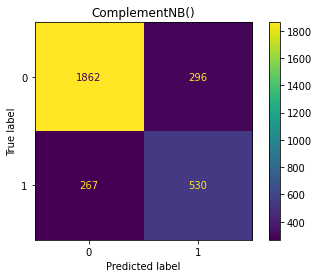

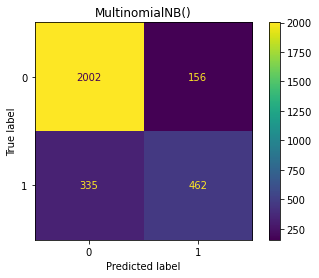

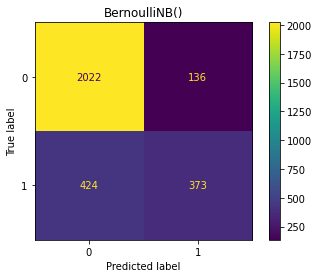

In [13]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
k= [CNB, MNB, BNB]
for i in k: 
    plot_confusion_matrix(i, X_test, y_test)  
    plt.title(i)
    plt.show()

0.8343338608754097 0.8343341515855914 0.846879458767412


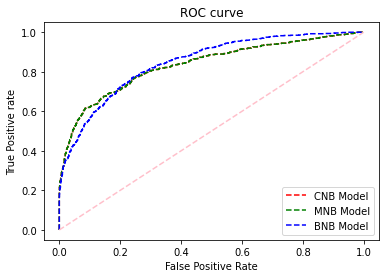

In [14]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models: 
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 4.6 Trying different n-grams:


### a) Bigram: ngram_range = (2,2)

In [18]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, df['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 77.09%


### b) Trigram: ngram_range= (3,3)¶

In [19]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, df['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')


model accuracy is 76.21%


## 4.7 TF-IDF: Term Frequency-Inverse Document Frequency

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(df['text'])

In [22]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, df['sentiment'],test_size=0.20,random_state=30)


In [23]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')



accuracy_score_mnb = 81.62%


In [24]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')


accuracy_score_bnb = 81.08%


In [25]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 80.47%


# THE END

# Referene: 
https://www.jigsawacademy.com/blogs/ai-ml/bayes-theorem-in-machine-learning

https://www.upgrad.com/blog/bayes-theorem-in-machine-learning/

https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e

https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb